<a href="https://colab.research.google.com/github/Nouman97/Computer-Vision/blob/master/Day_and_Night_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classifier to detect Day-time or Night-time using HSV color threshold

This project was inspired from a miniproject present in Udacity's computer vision nanodegree which can be accessed from: (https://www.udacity.com/course/computer-vision-nanodegree--nd891). The data for this project can be accessed from: 
(http://cs.uky.edu/~jacobs/datasets/amos/).

In [0]:
import numpy as np # used to manipulate tensor data (like matrices)

import matplotlib.image as mpimg # can be used to read and manipulate images (will read in RGB format)

import matplotlib.pyplot as plt # used to make plots

%matplotlib inline

import cv2 # computer vision library (reads images in BGR format)

In [0]:
import os # used to work with directories
import glob # used to parse through directories

# this function is supposed to load the data along with its label

def load_dataset(image_dir):
  
  # initializing an empty list in which the data will be stored as follows:
  # [(x_1, y_1), (x_2, y_2), . . ., (x_n, y_n)] where x_i = image, y_i = label
  
  image_list = [] 
  
  # two image types 
  
  image_types = ["day", "night"]
  
  # the file extensions end in their respective labels so it is easy to parse 
  # through them - first through directories ending with 'day' and then through
  # directories ending with 'night'
  
  for image_type in image_types:
    
    # glob.glob(filepath in unix style along with string manipulation); used to 
    # parse directories
    # eg: glob.glob('C:/Users/Data/Training/Day/*') will read all files in 
    # this directory irrespective of its name
    
    # os.path.join(a, b, c); joins the 3 strings a, b, c with a '/' inbetween
    # eg: os.path.join('C','Users','Data') -> 'C/Users/Data'
    
    for file in glob.glob(os.path.join(image_dir, image_type, "*")):
      
      image = mpimg.imread(file)
      
      # if there actually was an image
      
      if not image is None:
      
      # appending both the image and its label as a tuple element in the 
      # image_list
      
        image_list.append((image, image_type))
 
  return image_list

In [0]:
# to load data from google drive, we can use this command set

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# path where training data is stored

image_directory = '/content/gdrive/My Drive/CVND_Exercises-master/1_1_Image_Representation/day_night_images/training'

In [0]:
# loading dataset

dataset = load_dataset(image_directory)

Shape of the dataset:  (240, 2)
Type of the dataset:  <class 'numpy.ndarray'>
(737, 1024, 3)
night
(458, 800, 3)
day


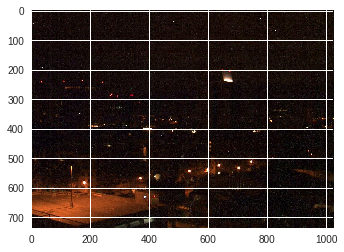

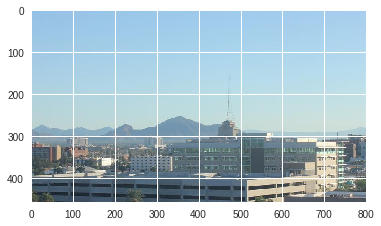

In [0]:
# exploring the dataset

# the structure is as follows: shape of (240, 2) means there are 240 data points
# with two columns, the first column containing the image, and the second 
# containing the label

dataset_1 = np.array(dataset)
print("Shape of the dataset: ", dataset_1.shape)
print("Type of the dataset: ", type(dataset_1))

image_index = 121
print(dataset_1[image_index, 0].shape)
print(dataset_1[image_index, 1])

plt.imshow(dataset_1[image_index, 0])

image_index = 0
print(dataset_1[image_index, 0].shape)
print(dataset_1[image_index, 1])

plt.figure()
plt.imshow(dataset_1[image_index, 0])

In [0]:
# this function should take in an RGB image and return a new, standardized 
# version

# standardizing is necessary as it ensures that all data is in a similar 
# condition

def standardize_input(image):
    
    # TODO: Resize image so that all "standard" images are the same size 
    # 600x1100 (hxw) 
    
    # cv2.resize(image, (desired_height, desired_width)) -> returns a resized 
    # image
    
    standard_im = cv2.resize(image, (600, 1100))
    
    return standard_im
  
# this function will convert the string labels to numerical labels
# since this is a binary classification problem, the labels will be '1' for 
# 'day' and '0' for 'night'
  
# Examples: 
# encode("day") should return: 1
# encode("night") should return: 0

def encode(label):
        
    numerical_val = 0
    
    ## TODO: complete the code to produce a numerical label
    
    if label == "day":
      numerical_val = 0
    elif label == "night":
      numerical_val = 1
    return numerical_val

In [0]:
# this function will take our previous data list, and process it such that all
# the images are the same size and all the labels are numerical

def standardize(image_list):
    
    # empty image data array
    
    standard_list = []

    # iterate through all the image-label pairs
    
    for item in image_list:
        image = item[0]
        label = item[1]

        # standardize the image
        
        standardized_im = standardize_input(image)

        # create a numerical label
        
        binary_label = encode(label)    

        # append the image, and it's one hot encoded label to the full, 
        # processed list of image data 
        
        standard_list.append((standardized_im, binary_label))
        
    return standard_list

# standardize all training images 

STANDARDIZED_LIST = standardize(dataset)

In [0]:
# this function takes in an rgb image and finds the average value of the value
# channel from the hsv version of the image

def average_brightness(rgb_image):
  hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
  
  # using np.sum to sum over all values of the value channel
  # had we used simple sum function, it would've summed up column wise
  
  value = np.sum(hsv[:,:,2])
  
  # image area = image_height * image_width
  
  image_area = rgb_image.shape[0] * rgb_image.shape[1]
  
  average_brightness = value/image_area
  
  return average_brightness

192.9562590909091


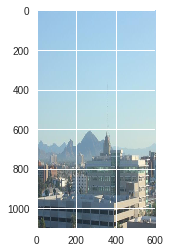

In [0]:
# exploring our average brightness function

a = average_brightness(STANDARDIZED_LIST[0][0])
print(a)
plt.imshow(STANDARDIZED_LIST[0][0])

In [0]:
# now we will go through every image in the dataset and record it's average 
# 'v' channel brightness in a list: one list is for 'day' images, and one is 
# for 'night' images; this will help us in determining a suitable threshold

day_brightness = []
night_brightness = []

for i in STANDARDIZED_LIST:
  if i[1] == 0:
    day_brightness.append(average_brightness(i[0]))
  elif i[1] == 1:
    night_brightness.append(average_brightness(i[0]))

print(len(day_brightness))
print(len(night_brightness))

# calculating the average brightness of both the day list and the night list

average_day_brightness = np.sum(day_brightness)/len(day_brightness)
average_night_brightness = np.sum(night_brightness)/len(night_brightness)

print(average_day_brightness)
print(average_night_brightness)

120
120
137.38209907828283
69.19784325757577


In [0]:
# this is going to be our classifier function and it is going to work as 
# follows: the previously calculated average brightness values are going to be
# passed in and a threshold is going to be defined as the value midway between
# the two averages (the day average and the night average); otherwise we can
# skip the threshold values and just pass in a preferred threshold

def classifier(rgb_image, avg_day_brightness = None, 
               avg_night_brightness = None, 
               threshold = None):
  
  # converting the input image to hsv
  
  hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
  
  # calculating its average 'v' channel brightness
  
  avg_brightness= np.sum(hsv[:,:,2])/(rgb_image.shape[0] * rgb_image.shape[1])
  
  # classifier model
  
  if threshold is None:
    diff = avg_day_brightness - avg_night_brightness
    if avg_brightness < (avg_night_brightness + diff/2):
      return 1
    elif avg_brightness > (avg_day_brightness - diff/2):
      return 0  
  elif threshold is not None:
    if avg_brightness < threshold:
      return 1
    elif avg_brightness > threshold:
      return 0

In [0]:
# this function will simply convert the numerical labels back to strings

def decode(label):
  if label == 0:
    return "day"
  elif label == 1:
    return "night"

average_day_brightness_threshold: 103.28997116792931
average_night_brightness_threshold: 103.28997116792931
91.66666666666666


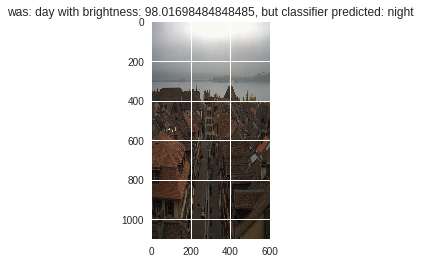

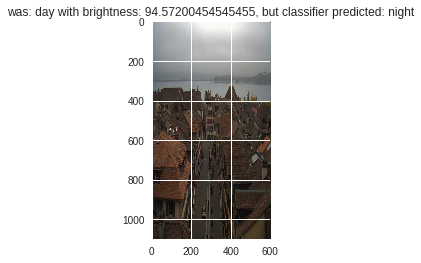

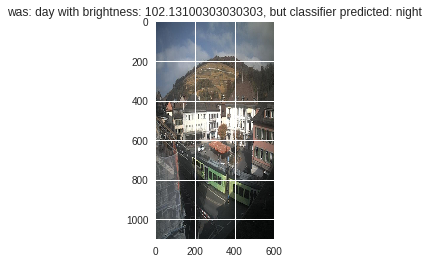

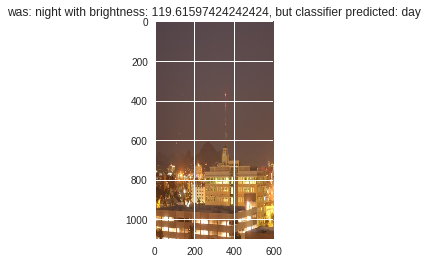

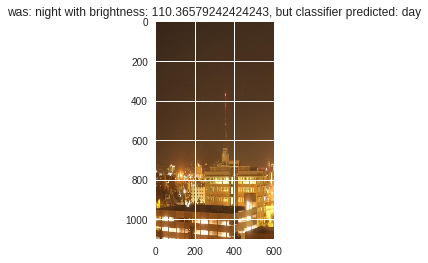

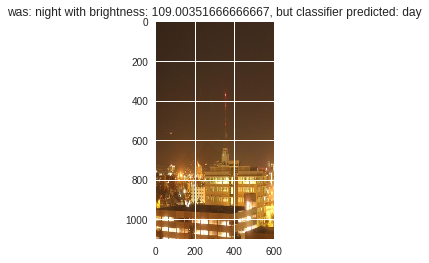

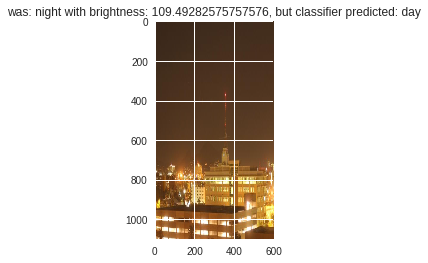

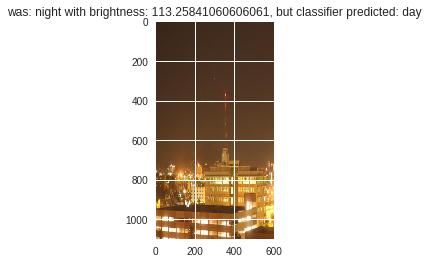

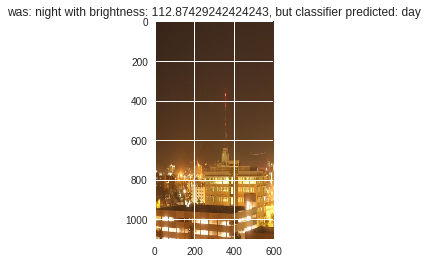

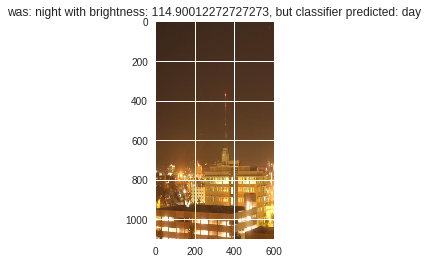

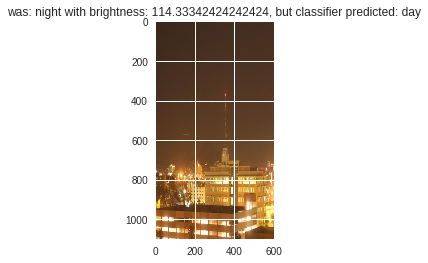

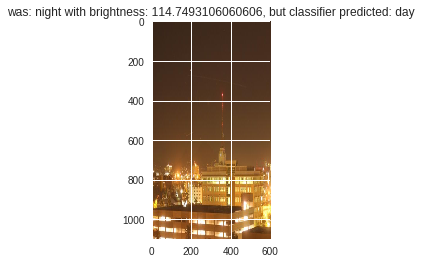

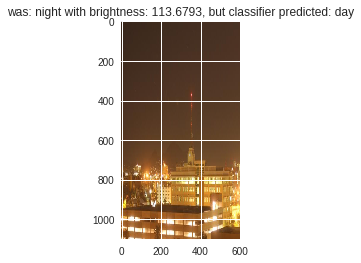

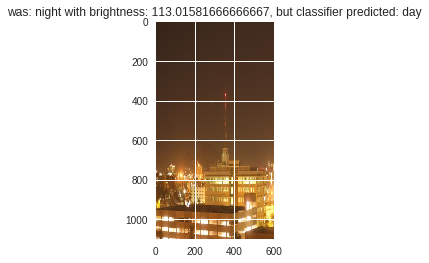

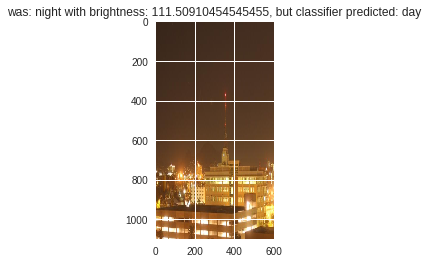

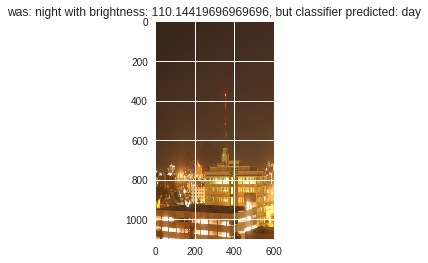

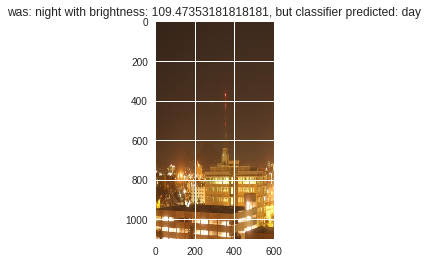

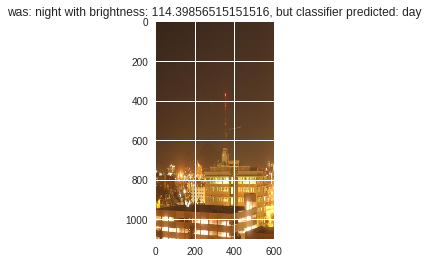

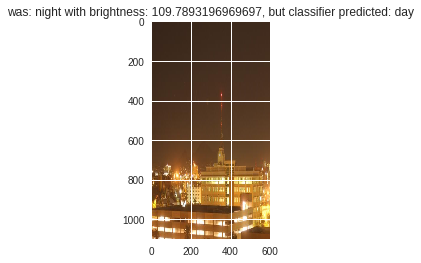

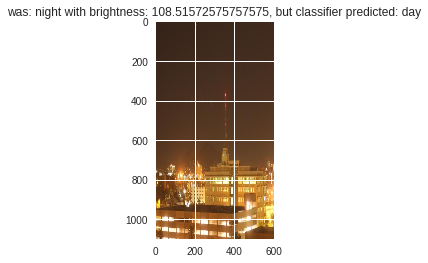

In [0]:
# this code snippet simply geos through the entire training set and checks the
# accuracy of our classifier by using the simple accuracy equation
# acc = 100 * (correctly_classified / total_samples)

correct = 0

# printing the two threshold values as were defined in the classifier function 

diff = average_day_brightness - average_night_brightness

print("average_day_brightness_threshold: " + 
      str(average_day_brightness - diff/2))
print("average_night_brightness_threshold: " + 
      str(average_night_brightness + diff/2))

# all the incorrectly classified images are shown along with their average 'v'
# channel values

for i in range(240):
  a = STANDARDIZED_LIST[i][0]
  b = decode(classifier(a, average_day_brightness, average_night_brightness))
  c = decode(STANDARDIZED_LIST[i][1])
  if c == b:
    correct = correct + 1
  elif c != b:
    plt.figure()
    plt.title("was: " + str(c) + " with brightness: " + 
              str(average_brightness(a)) + ", but classifier predicted: " + 
              str(b))
    plt.imshow(a)
  #plt.figure()
  #plt.title(str(b) + " and the real label is: " + str(c))
  #plt.imshow(a)
  
accuracy = correct / len(STANDARDIZED_LIST)
print(accuracy * 100)

In [0]:
# loading the test dataset and standardizing it

test_image_directory = '/content/gdrive/My Drive/CVND_Exercises-master/1_1_Image_Representation/day_night_images/test'
test_dataset = load_dataset(test_image_directory)
STANDARDIZED_TEST_LIST = standardize(test_dataset)

194.2690287878788


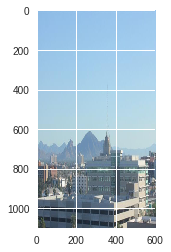

In [0]:
# exploring the test dataset

a = average_brightness(STANDARDIZED_TEST_LIST[0][0])
print(a)
plt.imshow(STANDARDIZED_TEST_LIST[0][0])

average_day_brightness_threshold: 103.28997116792931
average_night_brightness_threshold: 103.28997116792931
92.5


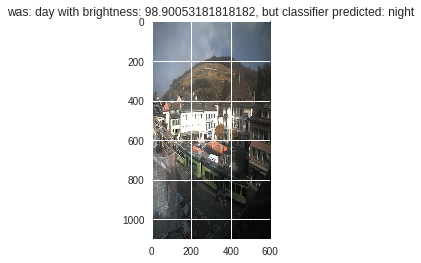

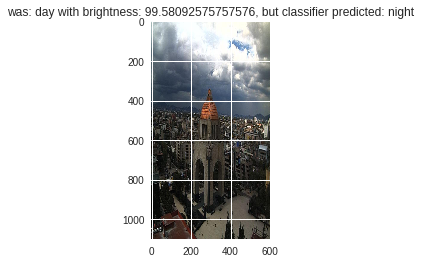

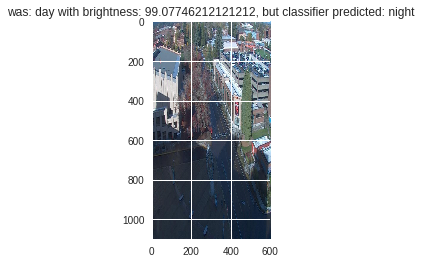

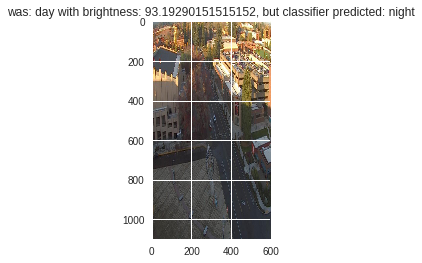

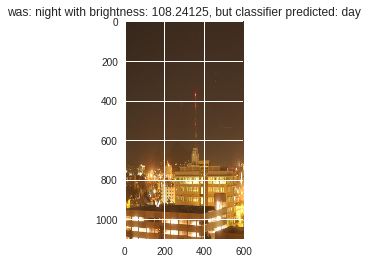

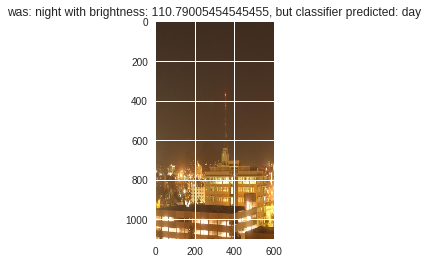

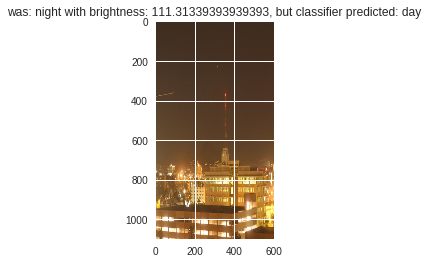

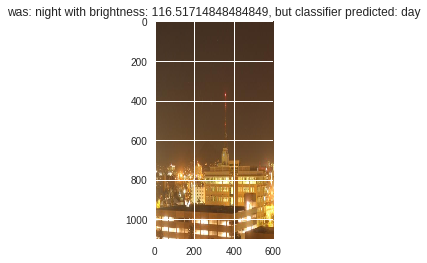

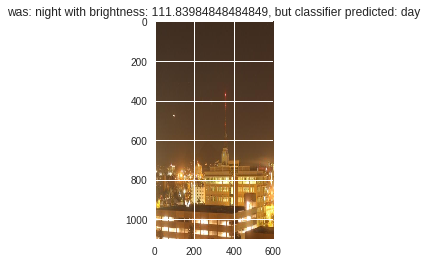

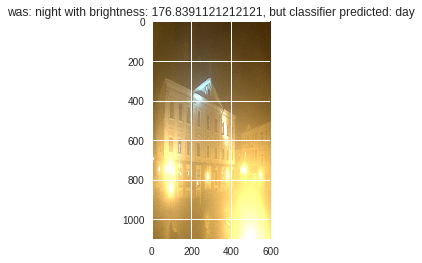

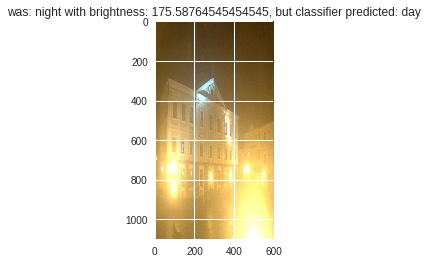

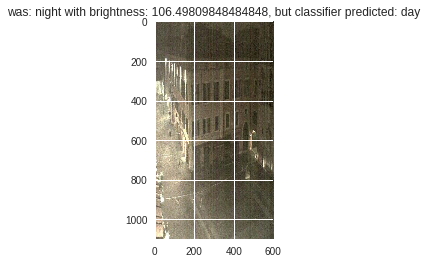

In [0]:
# calculating the accuracy over the test dataset
# was able to get 92.5% accuracy

correct = 0

diff = average_day_brightness - average_night_brightness

print("average_day_brightness_threshold: " + 
      str(average_day_brightness - diff/2))
print("average_night_brightness_threshold: " + 
      str(average_night_brightness + diff/2))

# all the incorrectly classified images are shown along with their average 'v'
# channel values

for i in range(len(STANDARDIZED_TEST_LIST)):
  a = STANDARDIZED_TEST_LIST[i][0]
  b = decode(classifier(a, average_day_brightness, average_night_brightness))
  c = decode(STANDARDIZED_TEST_LIST[i][1])
  if c == b:
    correct = correct + 1
  elif c != b:
    plt.figure()
    plt.title("was: " + str(c) + " with brightness: " + 
              str(average_brightness(a)) + ", but classifier predicted: " + 
              str(b))
    plt.imshow(a)
  #plt.figure()
  #plt.title(str(b) + " and the real label is: " + str(c))
  #plt.imshow(a)
  
accuracy = correct / len(STANDARDIZED_TEST_LIST)
print(accuracy * 100)